### IMDB

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [7]:
data_lm.save()

In [8]:
data = load_data(path)

### Tokenization

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk xxunk experience in general . xxmaj with graphics",positive
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj creative use of modern and mystical elements : 1956 xxmaj cadillac convertible to xxunk evil stepmother xxmaj xxunk xxmaj turner ( xxmaj john xxmaj waters ' " xxmaj serial xxmaj mom " ) and the 2 twisted sisters ; xxmaj queen xxmaj xxunk as the xxunk xxunk ; xxmaj david xxmaj warner ( xxmaj evil in " xxmaj time xxmaj xxunk " ) in xxunk at court ; xxmaj cinderella ( she 's a babe ) xxunk coal into an xxunk xxunk ; xxmaj cinderella and her prince charming both look like ( and act like ) rock stars . xxmaj isle of xxmaj man locations .

In [12]:
data.train_ds[0][0].data[:10]

array([   2,    4, 1469,  373,   13,  646,   11, 3804, 1118,   88])

### With the data block API

In [13]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
       .split_from_df(col=2)
       .label_from_df(cols=0)
       .databunch())

### Language model

In [14]:
bs = 48

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm')]

In [16]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/labeledBow.feat')]

In [17]:
(path/'train'/'pos').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3006_9.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1441_9.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/6778_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/8899_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3351_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/4862_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3173_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1157_10.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/466_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1376_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/10861_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/2206_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/2198_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/4187_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tra

In [18]:
(path/'test').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/test/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test/labeledBow.feat')]

In [19]:
(path/'unsup').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/unsup/20150_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/19796_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/47134_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/37222_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/2343_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/20943_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/19988_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/37892_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/36167_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/7143_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/49429_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/22543_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/8520_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/41712_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/28927_0.txt'),
 PosixPath('/home/jupyter/.f

### Fine tune language model from wikipedia English to imdb reviews English

In [20]:
data_lm = (TextList.from_folder(path)
          .filter_by_folder(include=['train', 'test', 'unsup'])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [21]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [22]:
data_lm.show_batch()

idx,text
0,". xxmaj and to make things worse , they have n't got any customers ( as their former boss predicted ) . xxmaj when the man pays them a visit in their shop , he challenges them to provide the meat for a dinner party he organizes . \n \n xxmaj than a tragic accident happens . xxmaj one of the butchers locks the electrician into the freezing chamber"
1,"the rear and got zapped by a rigged chair  were disgusted by some of the scenes in this film . xxmaj it 's not a matter of getting away with as much as possible  it 's a matter of saying , "" xxmaj is this even entertaining or funny ? "" xxmaj many times , sadly , it really is n't . \n \n xxmaj but for"
2,"good xxmaj harry , to no avail . \n \n xxmaj then there 's the satisfaction : xxmaj steve xxmaj buscemi has a great part as a transvestite , and xxmaj harvey xxmaj keitel 's moving story of his indignity playing a gorilla for a cheap xxup tv movie is incredible . xxmaj when you least expect it , xxmaj quentin xxmaj tarintino is doing half a monologue ,"
3,"remember some scary dress dummies and the like in various relatives ' attics and basements , and say what you like about how relatively straightforward xxmaj schmoeller and xxmaj carroll 's approach is - no one , before or since , has played it this well . xxmaj in real life , a good mannequin will make you do a double take - and here , that 's about the"
4,"climaxes the film is the stupidity and greed of the power company managers . xxmaj stupidity and greed though are commodities found every day . xxmaj the problem with them is that there are places where it can be tolerated less in human society . \n \n xxmaj lemmon shares star billing with a couple of famous xxmaj hollywood offspring , xxmaj jane xxmaj fonda and xxmaj michael xxmaj"


In [23]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


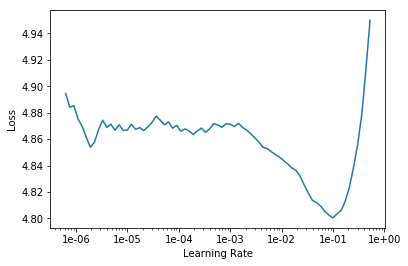

In [25]:
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.207336,4.058030,0.293702,23:56


In [27]:
learn.save('fit_head')

In [28]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj de xxmaj xxunk xxunk or xxmaj the xxmaj green xxmaj butchers as it is called in xxmaj english is a very dark comedy about two losers who work for a popular butcher . xxmaj they are fed up with their bosses criticism and decide to start a business on their own . xxmaj their shop is expensive and it does n't even have electricity all over the place . xxmaj and to make things worse , they have n't got any customers ( as their former boss predicted ) . xxmaj when the man pays them a visit in their shop , he challenges them to provide the meat for a dinner party he organizes . 
 
  xxmaj than a tragic accident happens . xxmaj one of the butchers locks the electrician into the freezing chamber when he closes the shop . xxmaj the man dies and the neurotic one of the two butchers decides to cut xxunk out of the electrician 's thigh and serves it to the dinner party instead of calling the police . xx

In [29]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.955030,3.883768,0.311008,26:51
1,3.860486,3.813851,0.320328,26:50
2,3.833061,3.770122,0.326419,26:54
3,3.758032,3.731199,0.330892,26:51
4,3.706286,3.702199,0.333998,26:51
5,3.668688,3.678701,0.336644,26:52
6,3.549172,3.660823,0.338854,26:54
7,3.525937,3.650210,0.340279,26:51
8,3.489914,3.645012,0.340870,26:50
9,3.461051,3.645124,0.340982,26:55


In [31]:
learn.save('fine_tuned')

In [32]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj de xxmaj xxunk xxunk or xxmaj the xxmaj green xxmaj butchers as it is called in xxmaj english is a very dark comedy about two losers who work for a popular butcher . xxmaj they are fed up with their bosses criticism and decide to start a business on their own . xxmaj their shop is expensive and it does n't even have electricity all over the place . xxmaj and to make things worse , they have n't got any customers ( as their former boss predicted ) . xxmaj when the man pays them a visit in their shop , he challenges them to provide the meat for a dinner party he organizes . 
 
  xxmaj than a tragic accident happens . xxmaj one of the butchers locks the electrician into the freezing chamber when he closes the shop . xxmaj the man dies and the neurotic one of the two butchers decides to cut xxunk out of the electrician 's thigh and serves it to the dinner party instead of calling the police . xx

In [33]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [34]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it was a comedy and did n't have the realism of stuff like the Matrix . The acting was n't anything special , but it was still great . i thought the movie was a little slow at
I liked this movie because of its story . The story is very well written and they are fun to watch . The movie is very well done in the way that many of the characters seem to be real people .


In [35]:
learn.save_encoder('fine_tuned_enc')

### Classifier

In [36]:
path = untar_data(URLs.IMDB)

In [37]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder(classes=['neg', 'pos'])
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [38]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [39]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",pos
"xxbos xxmaj by 1987 xxmaj hong xxmaj kong had given the world such films as xxmaj sammo xxmaj hung 's ` xxmaj encounters of the xxmaj spooky xxmaj kind ' xxmaj chow xxmaj yun xxmaj fat in xxmaj john xxmaj woo 's iconic ` a xxmaj better xxmaj tomorrow ' , ` xxmaj zu xxmaj warriors ' and the classic ` xxmaj mr xxmaj vampire ' . xxmaj jackie xxmaj",pos
"xxbos xxmaj to be a xxmaj buster xxmaj keaton fan is to have your heart broken on a regular basis . xxmaj most of us first encounter xxmaj keaton in one of the brilliant feature films from his great period of independent production : ' xxmaj the xxmaj general ' , ' xxmaj the xxmaj navigator ' , ' xxmaj sherlock xxmaj jnr ' . xxmaj we recognise him as",neg


## Create Model

In [40]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


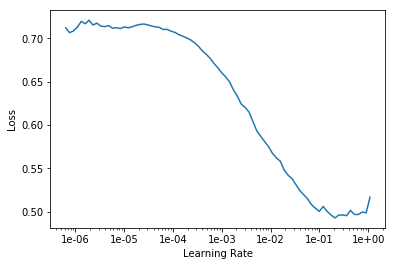

In [42]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.317723,0.194506,0.926560,03:45


In [47]:
learn.save('first')

In [48]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj while a 9 might seem like an unusually high score for such a slight film , however , compared to the hundreds and hundreds of series detective films from the 1930s and 40s , this is among the very best and also compares very favorably to xxmaj powell 's later " xxmaj thin xxmaj man " films . xxmaj now this does xxup not mean that the film is that similar to the xxmaj thin xxmaj man movies , as xxup the xxup kennel xxup murder xxup case is not a comedy but more a traditional mystery - detective film . xxmaj now you 'd think that not having xxmaj nora xxmaj charles or xxmaj asta or a traditional comic sidekick ( something found in practically all series detective films ) along for fun would be a detriment , but i did n't miss them at all because this was such an exceptionally well - written film -- having a genuinely interesting case as well as uniformly excellent performances by all . 
 
  xxmaj t

In [49]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.276495,0.177032,0.932640,04:30


In [50]:
learn.save('second')

In [51]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj while a 9 might seem like an unusually high score for such a slight film , however , compared to the hundreds and hundreds of series detective films from the 1930s and 40s , this is among the very best and also compares very favorably to xxmaj powell 's later " xxmaj thin xxmaj man " films . xxmaj now this does xxup not mean that the film is that similar to the xxmaj thin xxmaj man movies , as xxup the xxup kennel xxup murder xxup case is not a comedy but more a traditional mystery - detective film . xxmaj now you 'd think that not having xxmaj nora xxmaj charles or xxmaj asta or a traditional comic sidekick ( something found in practically all series detective films ) along for fun would be a detriment , but i did n't miss them at all because this was such an exceptionally well - written film -- having a genuinely interesting case as well as uniformly excellent performances by all . 
 
  xxmaj t

In [52]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.249099,0.206334,0.937640,06:18


In [53]:
learn.save('third')

In [54]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj while a 9 might seem like an unusually high score for such a slight film , however , compared to the hundreds and hundreds of series detective films from the 1930s and 40s , this is among the very best and also compares very favorably to xxmaj powell 's later " xxmaj thin xxmaj man " films . xxmaj now this does xxup not mean that the film is that similar to the xxmaj thin xxmaj man movies , as xxup the xxup kennel xxup murder xxup case is not a comedy but more a traditional mystery - detective film . xxmaj now you 'd think that not having xxmaj nora xxmaj charles or xxmaj asta or a traditional comic sidekick ( something found in practically all series detective films ) along for fun would be a detriment , but i did n't miss them at all because this was such an exceptionally well - written film -- having a genuinely interesting case as well as uniformly excellent performances by all . 
 
  xxmaj t

In [55]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.240896,0.155732,0.941320,07:41
1,0.227388,0.179934,0.939240,07:29


In [56]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([3.1369e-04, 9.9969e-01]))

In [61]:
learn.predict("I really really don't know what to say aobut that movie, it was hard to imagine the better!")

(Category neg, tensor(0), tensor([0.5854, 0.4146]))